# Convolutional Neural Networks for Image Segmentation
<small class="bottom">Some of the material from this lecture comes from online courses of Charles Ollion and Olivier Grisel - Master Datascience Paris Saclay.<br/><a href="https://creativecommons.org/licenses/by/4.0/" target="_blank">CC-By 4.0 license</a>
</small>

## CNNs for computer vision

<center>
    <img src="illustrations/vision.png" style="max-height:700px;width:auto;"/>
</center>

## Beyond Image Classification

### CNNs
- Previous lecture: image classification

### Limitations
- Mostly on centered images
- Only a single object per image
- Not enough for many real world vision tasks

## Beyond Image Classification


<center>
          <br/>
          <img src="illustrations/cls_1.png" style="width: 1200px;" />
</center>

## Beyond Image Classification


<center>
          <br/>
          <img src="illustrations/cls_2.png" style="width: 1200px;" />
</center>

## Beyond Image Classification

<center>
          <br/>
          <img src="illustrations/cls_3.png" style="width: 1200px;" />
</center>

## Beyond Image Classification


<center>
          <br/>
          <img src="illustrations/cls_4_2.png" style="width: 1200px;" />
</center>

## Beyond Image Classification

<center>
          <br/>
          <img src="illustrations/cls_4_3.png" style="width: 1200px;" />
</center>

## Outline


### Simple Localisation as regression

### Detection Algorithms

### Fully convolutional Networks

### Semantic & Instance Segmentation

## Localisation

<center>
          <img src="illustrations/dog.jpg" style="width: 400px;" />
</center>

- Single object per image
- Predict coordinates of a bounding box `(x, y, w, h)`

- Evaluate via Intersection over Union (IoU)

## Localisation as regression

<center>
          <img src="illustrations/regression_dog.svg" style="width: 700px;" />
</center>

## Classification + Localisation

<center>
          <img src="illustrations/doublehead.svg" style="width: 900px;" />
</center>

- Use a pre-trained CNN on ImageNet (ex. ResNet)
- The "localisation head" is trained seperately with regression
- At test time, use both heads

$C$ classes, $4$ output dimensions ($1$ box)

**Predict exactly $N$ objects:** predict $(N \times 4)$ coordinates and $(N \times K)$ class scores

## Object detection

We don't know in advance the number of objects in the image. Object detection relies on *object proposal* and *object classification*

**Object proposal:** find regions of interest (RoIs) in the image

**Object classification:** classify the object in these regions

### Two main families:

- Single-Stage: A grid in the image where each cell is a proposal (SSD, YOLO, RetinaNet)
- Two-Stage: Region proposal then classification (Faster-RCNN)

## YOLO  (You Only Look Once)
<center>
          <img src="illustrations/yolo1.png" style="width: 750px;" />
</center>

For each cell of the $S \times S$ predict:
- $B$ **boxes** and **confidence scores** $C$ ($5 \times B$ values) + **classes** $c$
- Final detections: $C_j * prob(c) > \text{threshold}$
<br/>
<small class="bottom">
    Redmon, Joseph, et al. "You only look once: Unified, real-time object detection." CVPR (2016)
</small>

## YOLO  (You Only Look Once)
<center>
          <img src="illustrations/yolo1.png" style="width: 750px;" />
</center>

YOLO features:
- Computationally very fast, can be used in real time
- Globally processing the entire image once only with a single CNN
<br/>
<small class="bottom">
    Redmon, Joseph, et al. "You only look once: Unified, real-time object detection." CVPR (2016)
</small>

## RetinaNet

<center>
          <img src="illustrations/retinanet.png" style="width: 1400px;" />
</center>

<small>
Lin, Tsung-Yi, et al. "Focal loss for dense object detection." ICCV 2017.
</small>

Single stage detector with:
- Multiple scales through a *Feature Pyramid Network*
- More than 100K boxes proposed
- Focal loss to manage imbalance between background and real objects

See this [post](https://towardsdatascience.com/review-retinanet-focal-loss-object-detection-38fba6afabe4) for more information

## RCNN
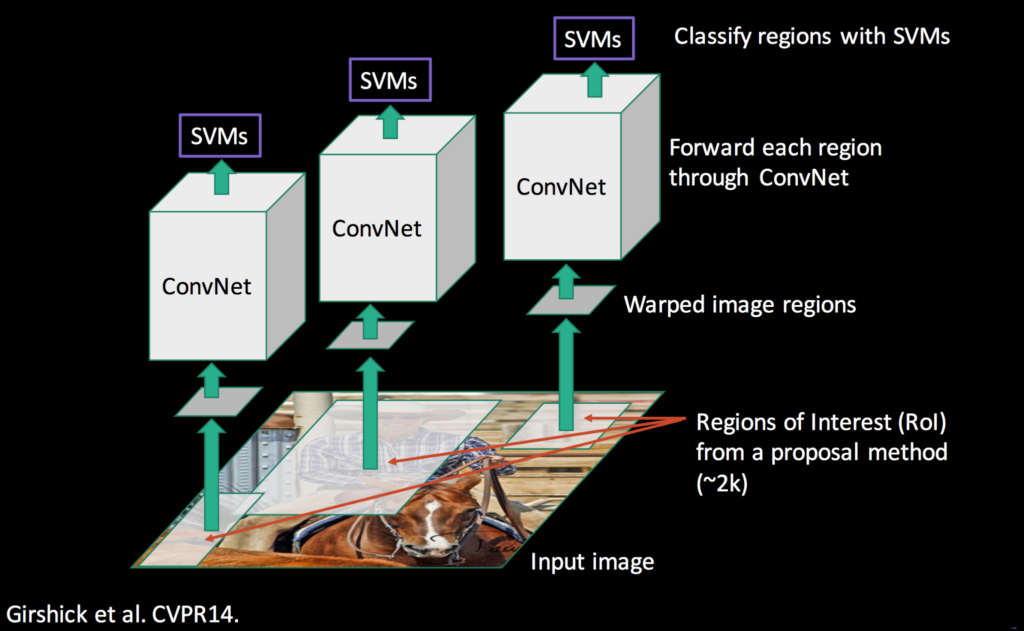

## SPPNet 

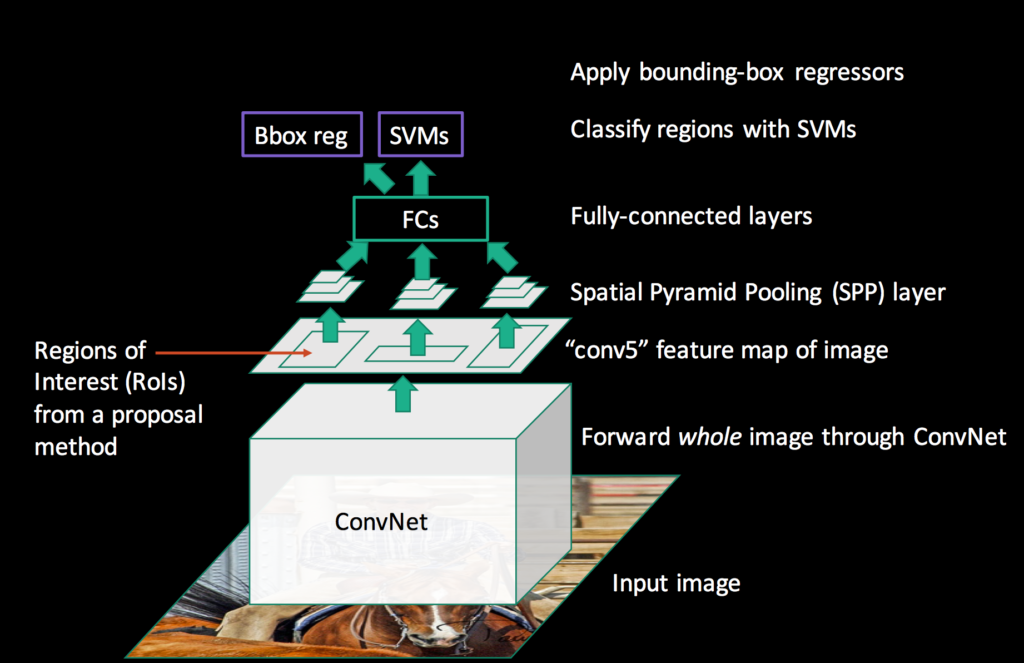

## Box Proposals

Instead of having a predefined set of box proposals, find them on the image:
- **Selective Search** - from pixels (not learnt)
- **Faster - RCNN** - Region Proposal Network (RPN)

**Crop-and-resize** operator (**RoI-Pooling**):
- Input: convolutional map + $N$ regions of interest
- Output: tensor of $N \times 7 \times 7 \times \text{depth}$ boxes
- Allows to propagate gradient only on interesting regions, and efficient computation

## Fast RCNN

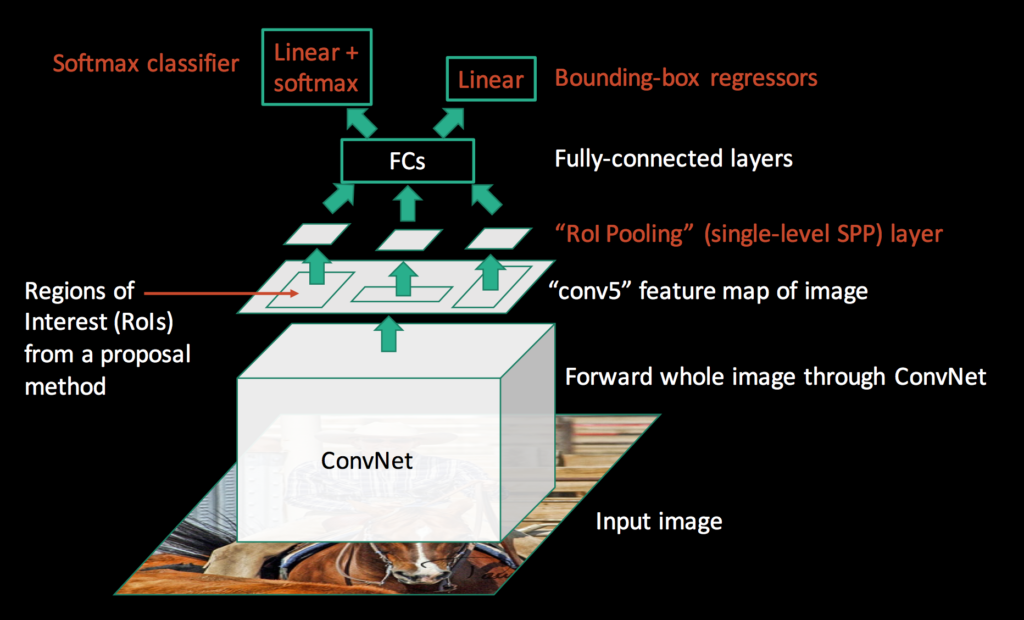

## Faster-RCNN

<center>
          <img src="illustrations/fastRCNN_2.png" style="width: 1000px;" />
</center>

<small>
Ren, Shaoqing, et al. "Faster r-cnn: Towards real-time object detection with region proposal networks." NIPS 2015
</small>

- Replace **Selective Search** with **RPN**, train jointly

- Region proposal is translation invariant, compared to YOLO

## Segmentation

Output a class map for each pixel (here: dog vs background)

<center>
          <img src="illustrations/dog_segment.jpg" style="width: 600px;" />
</center>

- **Instance segmentation**: specify each object instance as well (two dogs have different instances)

- This can be done through **object detection** + **segmentation**

## Convolutionize

<center>
          <img src="illustrations/convolutionalization.png" style="width: 800px;" />
</center>

<small>
Long, Jonathan, et al. "Fully convolutional networks for semantic segmentation." CVPR 2015
</small>

- Slide the network with an input of `(224, 224)` over a larger image. Output of varying spatial size

- **Convolutionize**: change Dense `(4096, 1000)` to $1 \times 1$ Convolution, with `4096, 1000` input and output channels

- Gives a coarse **segmentation** (no extra supervision)

## Fully Convolutional Network

<center>
          <img src="illustrations/densefc.png" style="width: 800px;" />
</center>

<small>
Long, Jonathan, et al. "Fully convolutional networks for semantic segmentation." CVPR 2015
</small>

- Predict / backpropagate for every output pixel

- Aggregate maps from several convolutions at different scales for more robust results

## Deconvolution

<center>
          <img src="illustrations/deconv.png" style="width: 1200px;" />
</center>

<small>
Noh, Hyeonwoo, et al. "Learning deconvolution network for semantic segmentation." ICCV 2015
</small>
<br/>
<br/>
- "Deconvolution": transposed convolutions
<center>
          <img src="illustrations/conv_deconv.png" style="width: 600px;" />
</center>

## Deconvolution

<center>
          <img src="illustrations/deconv.png" style="width: 1200px;" />
</center>

<small>
Noh, Hyeonwoo, et al. "Learning deconvolution network for semantic segmentation." ICCV 2015
</small>

- **skip connections** between corresponding convolution and deconvolution layers

- **sharper masks** by using precise spatial information (early layers)

- **better object detection** by using semantic information (late layers)

## Hourglass network

<center>
          <img src="illustrations/hourglass.png" style="width: 1200px;" />
</center>

<small>
Newell, Alejandro, et al. "Stacked Hourglass Networks for Human Pose Estimation." ECCV 2016
</small>

- U-Net like architectures repeated sequentially

- Each block refines the segmentation for the following

- Each block has a segmentation loss

## Mask-RCNN

<center>
          <img src="illustrations/maskrcnn.png" style="width: 760px;" />
</center>

<small>
K. He and al. Mask Region-based Convolutional Network (Mask R-CNN) NIPS 2017
</small>

Faster-RCNN architecture with a third, binary mask head

## Results

<center>
          <img src="illustrations/maskrcnnresults.png" style="width: 1400px;" />
</center>

<small>
K. He and al. Mask Region-based Convolutional Network (Mask R-CNN) NIPS 2017
</small>
<br/><br/>
- Mask results are still coarse (low mask resolution)
- Excellent instance generalization

## Results

<center>
          <img src="illustrations/maskrcnnresults2.png" style="width: 1200px;" />
</center>

<small>
He, Kaiming, et al. "Mask r-cnn." Internal Conference on Computer Vision (ICCV), 2017.
</small>

In [1]:
# Just tuning some CSS for better display of columns and small code

from IPython.core.display import HTML
HTML("""
<style>
.reveal .bottom {
    position: fixed;
    bottom: 100px;
}
.reveal h1 {
    position: fixed;
    top: 40%;
    text-align: center;
    width: 100%;
}
</style>
""")